In [ ]:
# 기종별 고장내용과 빈도수->그래프로 정리
# 고장내용별 조치부품
# 고장내용마다 조치부품별 처리결과->그래프로가능?
# 호기별 고장주기(데이터가 1년간의 제한적인 기간이므로 설치일자랑은 상관없을듯)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('통합 문서1.xlsx',header=1)
df.head()

,엘리베이터 호기,엘리베이터 기종,설치일자,고장일시,고장내용,조치부품,처리결과
0,002094L03,BAXVF,0000-00-00,2019-06-27 05:39:09,카 내부 버튼 불량,IN CAR and OPB-CLOSE BUTTON,교체
1,002094L04,BAXVF,0000-00-00,2019-06-18 08:18:29,카 내부 버튼 불량,INDICATOR and 승장버튼-HALL DOWN BUTTON (HPB DOWN),교체
2,002094L04,BAXVF,0000-00-00,2019-06-21 09:49:12,정지,HALL DOOR-HALL DOOR SILL,제거
3,002399L01,BAXVF,0000-00-00,2019-06-04 06:58:03,운행중정지,HALL DOOR-HALL DOOR SILL,제거
4,002399L04,BAXVF,0000-00-00,2019-06-13 19:26:12,정지,INDICATOR and 승장버튼-기타,확인 및 점검


In [ ]:
# 엘리베이터 기종별 고장내용과 빈도수
d1=df.groupby(['엘리베이터 기종','고장내용'])['처리결과'].count()
d1

엘리베이터 기종  고장내용            
2PZ       CCTV                  1
          도어 동작 이상              1
          열림/닫힘 반복              6
          운행중정지                 2
          인터폰 불량                1
          정지                    2
          출발불능                  1
BAXVF     CCTV                  3
          기계실 소음발생              1
          기타                   34
          도어 동작 이상             45
          도어 소음발생               9
          레벨 오차                 5
          분실물                   6
          스톱현상                 26
          승강기(카) 소음발생          16
          승강기(카) 진동발생          10
          열림/닫힘 반복              7
          외부요인으로 정지             1
          운행이상                  2
          운행중정지                27
          음성멘트                  3
          인터폰 불량                2
          점검요청                 16
          정전                    1
          정지                  159
          정지-운행불능               1
          조명등 불량                5
          착상시 진동발생   

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_

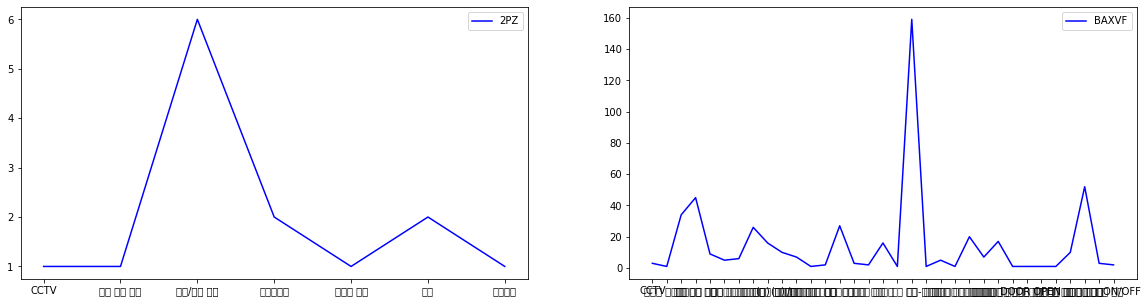

In [ ]:
# 위에꺼를 그래프로 나타내기
# 각 기종별로 발생한 고장내용이 다르기때문에, 차트 하나에 표현할수없고 각각 따로 봐야함
fig=plt.figure()
fig.set_size_inches(20,5)
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(d1['2PZ'],c='b',label='2PZ')
ax1.legend(fancybox=True)
ax2.plot(d1['BAXVF'],c='b',label='BAXVF')
ax2.legend(fancybox=True)
# 보면 기종별로 유독 많이 발생한 고장내용이 존재함, 전체데이터로 돌려봐야함

In [ ]:
# 엘리베이터 기종별 같은 고장내용으로 묶은 뒤, 그때그때 달라지는 조치부품 확인
d2=df.groupby(['엘리베이터 기종','고장내용'])
for a,b in d2:
  print('엘리베이터 기종 : ',a[0])
  print('고장내용(총 발생횟수) : ',a[1],'(',b['설치일자'].count(),')')
  print(b.groupby(['조치부품'])['엘리베이터 기종'].count(),'\n')

엘리베이터 기종 :  2PZ
고장내용(총 발생횟수) :  CCTV ( 1 )
조치부품
서비스사항-서비스기타    1
Name: 엘리베이터 기종, dtype: int64 

엘리베이터 기종 :  2PZ
고장내용(총 발생횟수) :  도어 동작 이상 ( 1 )
조치부품
CAR DOOR-기타    1
Name: 엘리베이터 기종, dtype: int64 

엘리베이터 기종 :  2PZ
고장내용(총 발생횟수) :  열림/닫힘 반복 ( 6 )
조치부품
HALL DOOR-HALL DOOR SILL      3
HALL DOOR-HALL DOOR TRACK     1
HALL DOOR-INTERLOCK ASSY      1
HALL DOOR-INTERLOCK SWITCH    1
Name: 엘리베이터 기종, dtype: int64 

엘리베이터 기종 :  2PZ
고장내용(총 발생횟수) :  운행중정지 ( 2 )
조치부품
HALL DOOR-HANGER ROLLER       1
HALL DOOR-INTERLOCK SWITCH    1
Name: 엘리베이터 기종, dtype: int64 

엘리베이터 기종 :  2PZ
고장내용(총 발생횟수) :  인터폰 불량 ( 1 )
조치부품
IN CAR and OPB-인터폰 자기    1
Name: 엘리베이터 기종, dtype: int64 

엘리베이터 기종 :  2PZ
고장내용(총 발생횟수) :  정지 ( 2 )
조치부품
HALL DOOR-INTERLOCK SWITCH    1
서비스사항-서비스기타                   1
Name: 엘리베이터 기종, dtype: int64 

엘리베이터 기종 :  2PZ
고장내용(총 발생횟수) :  출발불능 ( 1 )
조치부품
HALL DOOR-HALL DOOR SILL    1
Name: 엘리베이터 기종, dtype: int64 

엘리베이터 기종 :  BAXVF
고장내용(총 발생횟수) :  CCTV ( 3 )
조치부품
기타 PCB-기타      1
서비스사항-서비스기타    2
Name: 엘

In [ ]:
# 각 조치를 취했을 때 다음 고장까지 걸리는 시간
# 가장 오랫동안 고장이 안난 조치, 이때 사용된 부품 등